<h1> SOTA: BERT Based STS scores </h1>
<p>The pretrained SBERT embeddings which are fine tuned on STS dataset are used for generating sentence embeddings.</p>

In [3]:
import pandas as pd
import numpy as np

In [3]:
# train_df = pd.read_csv('../data/cleaned_train_df.csv')
# val_df = pd.read_csv('../data/cleaned_val_df.csv')
# test_df = pd.read_csv('../data/cleaned_test_df.csv')

In [5]:
train_df = pd.read_csv('../data/cleaned_train_df2.csv')
val_df = pd.read_csv('../data/cleaned_val_df2.csv')
test_df = pd.read_csv('../data/cleaned_test_df2.csv')

In [6]:
train_df['sent1'] = train_df['sent1'].apply(eval)
train_df['sent2'] = train_df['sent2'].apply(eval)

In [7]:
val_df['sent1'] = val_df['sent1'].apply(eval)
val_df['sent2'] = val_df['sent2'].apply(eval)

In [8]:
test_df['sent1'] = test_df['sent1'].apply(eval)
test_df['sent2'] = test_df['sent2'].apply(eval)

In [9]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

/Users/AH00434/opt/anaconda3/envs/nlp_venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
train_embeddings1 = list(train_df['sent1'])
train_embeddings2 = list(train_df['sent2'])

In [11]:
train_embeddings1 = [" ".join(i for i in j) for j in train_embeddings1]
train_embeddings2 = [" ".join(i for i in j) for j in train_embeddings2]

In [12]:
train_embeddings1 = model.encode(train_embeddings1)
train_embeddings2 = model.encode(train_embeddings2)

In [13]:
train_embeddings1.shape, train_embeddings2.shape

((5749, 768), (5749, 768))

In [14]:
train_df['norm_score'] = train_df["score"].apply(lambda x : (x - 2.5) / 2.5)

In [15]:
y_train = list(train_df["score"])

In [16]:
def sts_score(sim_score):
    sts_score = (sim_score+1) * 2.5
    return sts_score

In [29]:
from scipy import spatial
from scipy.stats import pearsonr

def get_sts_scores(emb1_lt, emb2_lt):
    y_pred = []
    for i in range(len(emb1_lt)):
        sim_score = 1 - spatial.distance.cosine(emb1_lt[i], emb2_lt[i])
        y_pred.append(sts_score(sim_score))
    return y_pred

def get_sts_scores_norm(emb1_lt, emb2_lt):
    y_pred = []
    for i in range(len(emb1_lt)):
        sim_score = 1 - spatial.distance.cosine(emb1_lt[i], emb2_lt[i])
        y_pred.append(sim_score)
    return y_pred
    
def pearson_corr(y_true, y_pred):
    """
    Calculate Pearson correlation coefficient between two arrays.
    """
    corr, _ = pearsonr(y_true, y_pred)
    return corr

In [18]:
y_pred = get_sts_scores(train_embeddings1, train_embeddings2)

In [19]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(y_train, y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.92


In [20]:
val_embeddings1 = list(val_df['sent1'])
val_embeddings2 = list(val_df['sent2'])

In [21]:
val_embeddings1 = [" ".join(i for i in j) for j in val_embeddings1]
val_embeddings2 = [" ".join(i for i in j) for j in val_embeddings2]

In [22]:
val_embeddings1 = model.encode(val_embeddings1)
val_embeddings2 = model.encode(val_embeddings2)

In [23]:
val_df['norm_score'] = val_df["score"].apply(lambda x : (x - 2.5) / 2.5)

In [24]:
y_val = list(val_df["score"])

In [25]:
y_pred = get_sts_scores(val_embeddings1, val_embeddings2)

In [26]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(y_val, y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.83


In [27]:
test_embeddings1 = list(test_df['sent1'])
test_embeddings2 = list(test_df['sent2'])

In [28]:
test_embeddings1 = [" ".join(i for i in j) for j in test_embeddings1]
test_embeddings2 = [" ".join(i for i in j) for j in test_embeddings2]

In [29]:
test_embeddings1 = model.encode(test_embeddings1)
test_embeddings2 = model.encode(test_embeddings2)

In [30]:
y_test = list(test_df["score"])

In [31]:
test_df["normalized_score"] = test_df["score"].apply(lambda x : (x - 2.5) / 2.5)

In [32]:
y_test_norm = list(test_df["normalized_score"])

In [33]:
#normalized_score = (original_score - 2.5) / 2.5

In [34]:
test_embeddings1.shape, test_embeddings2.shape

((1379, 768), (1379, 768))

In [35]:
y_pred = get_sts_scores_norm(test_embeddings1, test_embeddings2)

In [36]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(y_test_norm, y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.80


In [52]:
test_emb1 = model.encode("boy came to college")
test_emb2 = model.encode("boy came from college")

In [53]:
test_emb1.shape

(768,)

In [54]:
sim_score = 1 - spatial.distance.cosine(test_emb1, test_emb2)

In [55]:
sim_score

0.9106775522232056

In [45]:
row_max_len = lambda row: max(len(row['sent1']), len(row['sent2']))

In [46]:
train_df['sent_len'] = train_df.apply(row_max_len, axis=1)

In [47]:
val_df['sent_len'] = val_df.apply(row_max_len, axis=1)

In [48]:
test_df['sent_len'] = test_df.apply(row_max_len, axis=1)

In [49]:
test_df['diff'] = abs(test_df['score'] - y_pred)

In [50]:
grouped_test = test_df.groupby(['sent_len']).mean()

/var/folders/gb/8lc9v2sx5mq19kgysgv67bzw0000gn/T/ipykernel_36300/1156243688.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_test = test_df.groupby(['sent_len']).mean()


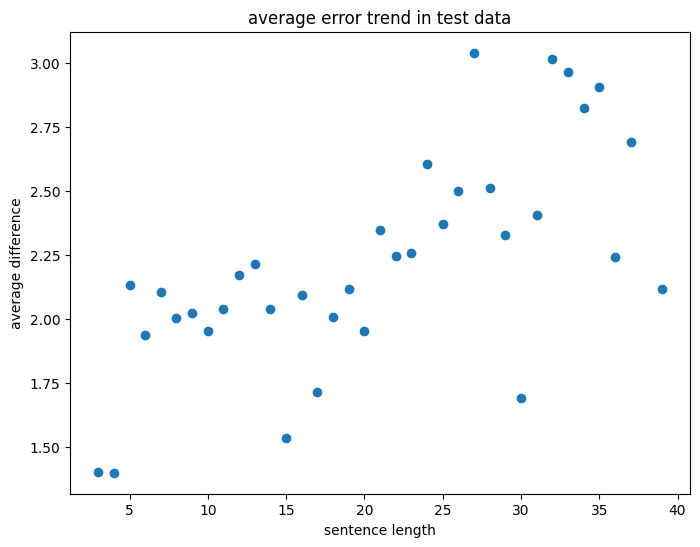

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(list(grouped_test.index), list(grouped_test['diff']))
plt.title("average error trend in test data")
plt.xlabel("sentence length")
plt.ylabel("average difference")
plt.show()

# Regression model training on embeddings

In [59]:
# Concatenate the sentence embeddings element-wise
X = np.concatenate([train_embeddings1, train_embeddings2], axis=1)

In [65]:
y = train_df['score'].values

In [69]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model
reg = LinearRegression().fit(X, y)

In [70]:
X_val = np.concatenate([val_embeddings1, val_embeddings2], axis=1)

In [71]:
y_val = val_df['score'].values

In [72]:
y_pred = reg.predict(X_val)

In [74]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(y_val, y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.10


# Bert fine tuning

In [9]:
train_df = pd.read_csv('../data/cleaned_train_df_sent.csv')
val_df = pd.read_csv('../data/cleaned_val_df_sent.csv')
test_df = pd.read_csv('../data/cleaned_test_df_sent.csv')

In [10]:
train_df['score'] = train_df["score"].apply(lambda x : (x) / 5.0)
val_df['score'] = val_df["score"].apply(lambda x : (x ) / 5.0)
test_df['score'] = test_df["score"].apply(lambda x : (x ) / 5.0)

In [11]:
max(train_df['score'])

1.0

In [13]:
from transformers import BertForSequenceClassification, AdamW, BertTokenizer

# Load pre-trained model and tokenizer
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Set optimizer
#optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

In [14]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert sentences to input features
def convert_sentences_to_features(sentences, tokenizer, max_seq_length):
    input_ids = []
    attention_masks = []
    token_type_ids = []

    for sent in sentences:
        encoded_dict = tokenizer.encode_plus(
                            sent[0],                      # Sentence 1
                            sent[1],                      # Sentence 2
                            add_special_tokens = True,    # Add '[CLS]' and '[SEP]'
                            max_length = max_seq_length,  # Pad or truncate sentences
                            truncation=True,
                            #pad_to_max_length = True,
                            padding = 'max_length',
                            return_attention_mask = True, # Construct attention masks
                            return_tensors = 'pt',        # Return PyTorch tensors
                            truncation_strategy='longest_first'
                       )

        # Add the encoded sentence to the list
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
        token_type_ids.append(encoded_dict['token_type_ids'])

    # Convert the lists to tensors
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    token_type_ids = torch.cat(token_type_ids, dim=0)

    return input_ids, attention_masks, token_type_ids

# Create input features and labels
max_seq_length = 100

sentences = train_df[['sent1', 'sent2']].values.tolist()
labels = train_df['score'].values

input_ids, attention_masks, token_type_ids = convert_sentences_to_features(sentences, tokenizer, max_seq_length)

# Convert the labels to a tensor
labels = torch.tensor(labels, dtype=torch.float)


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


In [15]:
input_ids.shape

torch.Size([5749, 100])

In [16]:
val_sentences = val_df[['sent1', 'sent2']].values.tolist()
val_labels = val_df['score'].values

val_input_ids, val_attention_masks, val_token_type_ids = convert_sentences_to_features(val_sentences, tokenizer, max_seq_length)

# Convert the labels to a tensor
val_labels = torch.tensor(val_labels, dtype=torch.float)


In [17]:
test_sentences = test_df[['sent1', 'sent2']].values.tolist()
test_labels = test_df['score'].values

test_input_ids, test_attention_masks, test_token_type_ids = convert_sentences_to_features(test_sentences, tokenizer, max_seq_length)

# Convert the labels to a tensor
test_labels = torch.tensor(test_labels, dtype=torch.float)

In [18]:
# Create a PyTorch DataLoader object for the training set
batch_size = 32

train_data = TensorDataset(input_ids, attention_masks, token_type_ids, labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create a PyTorch DataLoader object for the validation set
validation_data = TensorDataset(val_input_ids, val_attention_masks, val_token_type_ids, val_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [19]:
# Create a PyTorch DataLoader object for the test set
test_data = TensorDataset(test_input_ids, test_attention_masks, test_token_type_ids, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [20]:
# Define hyperparameters
MAX_LEN = 100
BATCH_SIZE = 32
EPOCHS = 4
LEARNING_RATE = 2e-5

from transformers import BertModel, BertConfig, BertForSequenceClassification, AdamW
# Load the pre-trained BERT model
#model = BertModel.from_pretrained('bert-base-uncased')

# Define the configuration for the fine-tuned model
config = BertConfig.from_pretrained(
    'bert-base-uncased',
    num_labels=1,
    output_attentions=False,
    output_hidden_states=False,
)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
# Define the fine-tuned model for sentence similarity task
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', config=config)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [111]:
# Define the optimizer and loss function for training
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE, eps=1e-8)
loss_fn = torch.nn.MSELoss()

# Fine-tune the BERT model for the sentence similarity task
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0.0
    for step, batch in enumerate(train_dataloader):
        batch_input_ids, batch_attention_masks, _, batch_labels = tuple(t for t in batch)
        optimizer.zero_grad()
        outputs = model(batch_input_ids, token_type_ids=None, attention_mask=batch_attention_masks, labels=batch_labels)
        loss = outputs[0]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(total_loss / len(train_dataloader))

0.6166746909419696
0.3835343765715758
0.28273599785235193
0.20503181624743674


In [23]:
#torch.save(model, "semantic_sim_bert_v3.pt")

In [24]:
#model = torch.load("semantic_sim_bert_v3.pt")

In [112]:
model.eval()
y_pred_test = []
y_true = []
with torch.no_grad():
  for step, batch in enumerate(validation_dataloader):
    batch_input_ids, batch_attention_masks, _, batch_labels = tuple(t for t in batch)
    val_outputs = model(batch_input_ids, token_type_ids=None, attention_mask=batch_attention_masks, labels=batch_labels)
    list_array = val_outputs[1].tolist()
    y_true.extend(batch_labels.tolist())
    y_pred_test.extend([i[0] for i in list_array])


In [113]:
corr = pearson_corr(y_true, y_pred_test)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.85


In [117]:
model.eval()
y_pred_test = []
y_test = []
with torch.no_grad():
  for step, batch in enumerate(test_dataloader):
    batch_input_ids, batch_attention_masks, _, batch_labels = tuple(t for t in batch)
    val_outputs = model(batch_input_ids, token_type_ids=None, attention_mask=batch_attention_masks, labels=batch_labels)
    list_array = val_outputs[1].tolist()
    y_test.extend(batch_labels.tolist())
    y_pred_test.extend([i[0] for i in list_array])


In [118]:
corr = pearson_corr(y_test, y_pred_test)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.81


# Transfer Learning

In [178]:
import torch
from torch.utils.data import Dataset, DataLoader

# Define the dummy dataset
class SimilarityDataset(Dataset):
    def __init__(self, sentence_pairs, similarity_scores, tokenizer, max_length):
        self.sentence_pairs = sentence_pairs
        self.similarity_scores = similarity_scores
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.sentence_pairs)
    
    def __getitem__(self, index):
        input_ids = torch.tensor(self.tokenizer.encode(self.sentence_pairs[index][0], self.sentence_pairs[index][1], add_special_tokens=True, padding=True, truncation='only_first', max_length=self.max_length))
        attention_mask = torch.ones_like(input_ids)
        similarity = torch.tensor(self.similarity_scores[index], dtype=torch.float32)
        
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'similarity': similarity}

# Define a collate function for padding the input sequences
def pad_sequences(batch):
    input_ids = [item['input_ids'] for item in batch]
    attention_mask = [item['attention_mask'] for item in batch]
    similarity = [item['similarity'] for item in batch]
    
    # Pad the sequences to the maximum length in the batch
    input_ids = torch.nn.utils.rnn.pad_sequence(input_ids, batch_first=True, padding_value=0)
    attention_mask = torch.nn.utils.rnn.pad_sequence(attention_mask, batch_first=True, padding_value=0)
    
    return {'input_ids': input_ids, 'attention_mask': attention_mask, 'similarity': torch.stack(similarity)}



In [179]:
train_df = pd.read_csv('../data/stsb-en-train.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [180]:
train_df.head()

,sent1,sent2,score
0,A plane is taking off.,An air plane is taking off.,5.00
1,A man is playing a large flute.,A man is playing a flute.,3.80
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80
3,Three men are playing chess.,Two men are playing chess.,2.60
4,A man is playing the cello.,A man seated is playing the cello.,4.25


In [181]:
sentence_pairs = []
for index, row in train_df.iterrows():
    sentence_pairs.append((row['sent1'], row['sent1']))

In [182]:
sentence_pairs[0]

('A plane is taking off.', 'A plane is taking off.')

In [183]:
similarity_scores = list(train_df["score"])

In [184]:
min(similarity_scores), max(similarity_scores)

(0.0, 5.0)

In [185]:
# Generate dummy data
# sentence_pairs = [('The cat sat on the mat', 'The dog played in the yard'),
#                   ('I love eating pizza', 'Pizza is my favorite food'),
#                   ('The sun is shining', 'The weather is beautiful')]
# similarity_scores = [0.2, 0.8, -0.6]

from transformers import DistilBertModel, DistilBertTokenizer

# Initialize the tokenizer and define the maximum sequence length
tokenizer = DistilBertTokenizer.from_pretrained('sentence-transformers/distilbert-base-nli-stsb-mean-tokens')
max_length = 128


# Create dataset and dataloader
dataset = SimilarityDataset(sentence_pairs, similarity_scores, tokenizer, max_length)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, collate_fn=pad_sequences)


In [186]:
model = DistilBertModel.from_pretrained('sentence-transformers/distilbert-base-nli-stsb-mean-tokens')

In [187]:
# Freeze pre-trained weights
for param in model.parameters():
    param.requires_grad = False

In [188]:
import torch.nn as nn
class SimilarityClassifier(nn.Module):
    def __init__(self, hidden_size, dropout_rate=0.1):
        super(SimilarityClassifier, self).__init__()
        self.fc1 = nn.Linear(hidden_size, 128)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, input_ids, attention_mask):
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs[0].mean(dim=1)
        x = nn.functional.relu(self.fc1(pooled_output))
        x = self.dropout1(x)
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x


criterion = nn.MSELoss()

In [189]:
hidden_size = 768
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

similarity_classifier = SimilarityClassifier(hidden_size = hidden_size)
# Define the optimizer and learning rate
optimizer = torch.optim.AdamW(similarity_classifier.parameters(), lr=0.001)

# Train the model
for epoch in range(num_epochs):
    epoch_loss = 0.0  # initialize total loss for this epoch
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        target = batch['similarity'].to(device)

        # Forward pass
        output = similarity_classifier(input_ids=input_ids, attention_mask=attention_mask)
        
        loss = criterion(output.squeeze(1), target)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()  # add batch loss to total epoch loss

    avg_loss = epoch_loss / len(dataloader)  # compute average epoch loss
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

Epoch 1/10, Average Loss: 2.3441
Epoch 2/10, Average Loss: 1.9431
Epoch 3/10, Average Loss: 1.7959
Epoch 4/10, Average Loss: 1.6547
Epoch 5/10, Average Loss: 1.5856
Epoch 6/10, Average Loss: 1.4237
Epoch 7/10, Average Loss: 1.3290
Epoch 8/10, Average Loss: 1.2120
Epoch 9/10, Average Loss: 1.1130
Epoch 10/10, Average Loss: 1.0395


In [191]:
test_df = pd.read_csv('../data/stsb-en-test.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [192]:
test_sentence_pairs = []
for index, row in test_df.iterrows():
    test_sentence_pairs.append((row['sent1'], row['sent1']))

In [193]:
test_similarity_scores = list(test_df["score"])

In [194]:
# Create dataset and dataloader
test_dataset = SimilarityDataset(test_sentence_pairs, test_similarity_scores, tokenizer, max_length)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, collate_fn=pad_sequences)

In [195]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Put model in evaluation mode
similarity_classifier.eval()

# Initialize empty lists to store predictions and targets
predictions = []
targets = []

# Evaluate the model on test dataset
with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        target = batch['similarity'].to(device)

        # Forward pass
        output = similarity_classifier(input_ids=input_ids, attention_mask=attention_mask)

        # Append predictions and targets
        predictions += output.squeeze(1).tolist()
        targets += target.tolist()

# Calculate and print evaluation metrics
mse = mean_squared_error(targets, predictions)
mae = mean_absolute_error(targets, predictions)
r2 = r2_score(targets, predictions)

print(f"Test MSE: {mse:.4f}, Test MAE: {mae:.4f}, Test R2 Score: {r2:.4f}")

Test MSE: 2.7882, Test MAE: 1.3752, Test R2 Score: -0.1990


In [197]:
values = [max(0, min(value, 5)) for value in predictions]

In [198]:
corr = pearson_corr(targets, values)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.12
